# Aula 02

![](../../data/imagem/banner-pos-2022.jpg)

-----------

# Importando Bibliotecas

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [38]:
PATH_DIR = '../../data/imagem'

sorted(os.listdir(PATH_DIR))

['arroz.png',
 'banner-pos-2022.jpg',
 'bilateral.jpg',
 'captura_de_movimento_1.png',
 'captura_de_movimento_2.png',
 'circle_binario.jpg',
 'circle_binario_ruido_1.png',
 'circle_binario_ruido_2.png',
 'coffe_1.jpeg',
 'coffe_2.jpeg',
 'coffe_3.jpeg',
 'color_spaces.png',
 'comprimidos.png',
 'containers.png',
 'cubo_magico.png',
 'dados_01.jpg',
 'dados_02.jpg',
 'dados_03.jpg',
 'dados_04.jpg',
 'estacionamento.png',
 'fichas_pretas.png',
 'fichas_vermelhas.png',
 'galaxia.png',
 'graos_de_cafe.png',
 'grupo_de_pessoas_sorrindo.jpg',
 'image_detect_shape.jpg',
 'image_exemplo_segementacao.jpeg',
 'imagem_folha.jpg',
 'imagem_folha_binaria.bmp',
 'imagem_folha_cinza.jpg',
 'imagem_frutas.jpg',
 'imagem_mao_e_bola_tenis.jpg',
 'img_coffe_1.jpg',
 'img_coffe_2.jpg',
 'lena_cinza.png',
 'lenna_250.png',
 'livro_01.jpeg',
 'livro_02.jpeg',
 'livro_03.jpeg',
 'logo_opencv.png',
 'logo_opencv_e_python.png',
 'logo_opencv_e_python_sparse_noise.png',
 'lua.jpg',
 'maquina.png',
 'match_shap

In [11]:
def img_path(path):
  return os.path.join(PATH_DIR, path)

def plot_image(image, title, nrow, ncol, idx, cmap_type='gray'):
  plt.subplot(nrow, ncol, idx)
  if len(image.shape) == 3:
    cmap_type = None
  plt.imshow(image, cmap=cmap_type)  
  plt.title(title)
  plt.axis('off')

# Segmentação de Objetos

* A segmentação de objetos em imagem é uma das principais etapas de um sistema baseado em Visão Computacional. Essa etapa consiste em separar somente a área que representa o objeto de interesse em uma nova imagem, excluindo também o segundo plano dessa região.
* O objeto a ser estudado é considerado o primeiro plano da imagem. Os pixels que não fazem parte de sua representação são denominados como segundo plano. A segmentação é o primeiro passo para que possamos extrair características do objeto.
* Somente com ele segmentado, é possível obter informações e detalhes que tornam possível classificá-lo. 
* Veremos quatro métodos para segmentação de objetos em imagens:
    * Segmentação por binarização.
    * Segmentação por cor
    * Segmentação por bordas
    * Segmentação por movimento

## Segmentação por binarização

A segmentação por binarização, também conhecida como aplicação de limiar de intensidade, é um dos métodos mais simples e eficazes para separar objetos de interesse do fundo em uma imagem. Esse processo consiste em converter uma imagem em tons de cinza para uma imagem binária, onde os pixels são classificados como objeto ou fundo com base em um limiar predefinido.

### Binarização Global

O processo de binarização global usa um limiar fixo para classificar os pixels da imagem. Quando um pixel tem um valor superior ao limiar, ele é definido como branco (255); caso contrário, é definido como preto (0). Na biblioteca OpenCV, essa operação pode ser realizada com a função `cv2.threshold`, que recebe quatro parâmetros principais:

* Imagem de entrada: deve estar em tons de cinza.
* Valor do limiar: definido manualmente, geralmente por tentativa e erro.
* Valor máximo: intensidade atribuída aos pixels acima do limiar.
* Tipo de limiar: define se o objeto será representado na cor preta (`cv2.THRESH_BINARY`) ou branca (`cv2.THRESH_BINARY_INV`).

In [6]:
img = cv2.imread(img_path("graos_de_cafe.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th, img_binarizada = cv2.threshold(img_gray, 140, 255, cv2.THRESH_BINARY_INV)

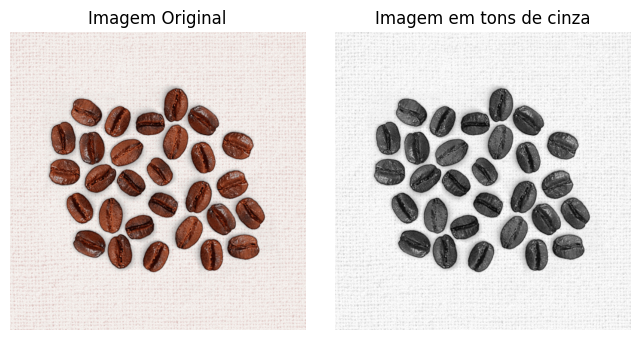

In [7]:
plt.figure(figsize=(8, 5))

plot_image(img, "Imagem Original", 1, 2, 1)
plot_image(img_gray, "Imagem em tons de cinza", 1, 2, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

img_tratada1 = cv2.morphologyEx(img_binarizada, cv2.MORPH_CLOSE, kernel, iterations=1)
img_tratada2 = cv2.erode(img_tratada1, kernel, iterations=1)

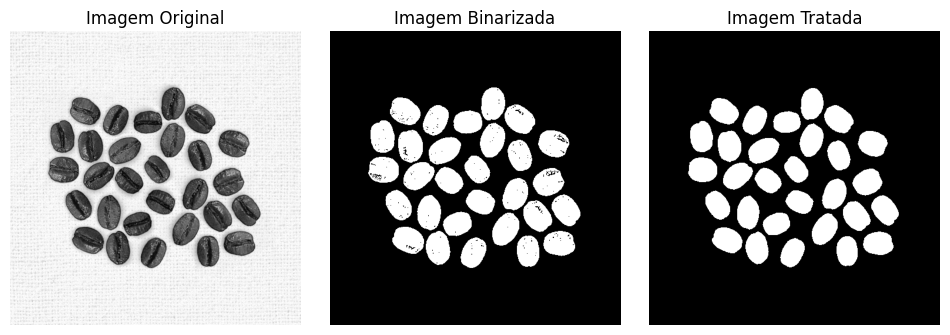

In [9]:
plt.figure(figsize=(12, 5))

plot_image(img_gray, "Imagem Original", 1, 3, 1)
plot_image(img_binarizada, "Imagem Binarizada", 1, 3, 2)
plot_image(img_tratada2, "Imagem Tratada", 1, 3, 3)

plt.subplots_adjust(wspace=0.1)
plt.show()

### Binarização Adaptativa

Quando a imagem possui iluminação desigual, a binarização adaptativa se torna uma alternativa melhor. Nesse método, o limiar é calculado localmente para diferentes regiões da imagem, garantindo uma segmentação mais precisa.

A função adaptiveThreshold da OpenCV permite realizar esse processo e requer seis parâmetros:
* Imagem de entrada
* Valor máximo da intensidade do pixel
* Método de cálculo do limiar (ADAPTIVE_THRESH_MEAN_C ou ADAPTIVE_THRESH_GAUSSIAN_C)
* Tipo de limiar (THRESH_BINARY ou THRESH_BINARY_INV)
* Tamanho da máscara (número ímpar que define a região analisada para o cálculo do limiar)
* Constante subtraída do limiar calculado

In [12]:
img = cv2.imread(img_path('comprimidos.png'), 0)

th, img_binarizada_global = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

img_binarizada_adaptativa = cv2.adaptiveThreshold(
    img, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 5
)

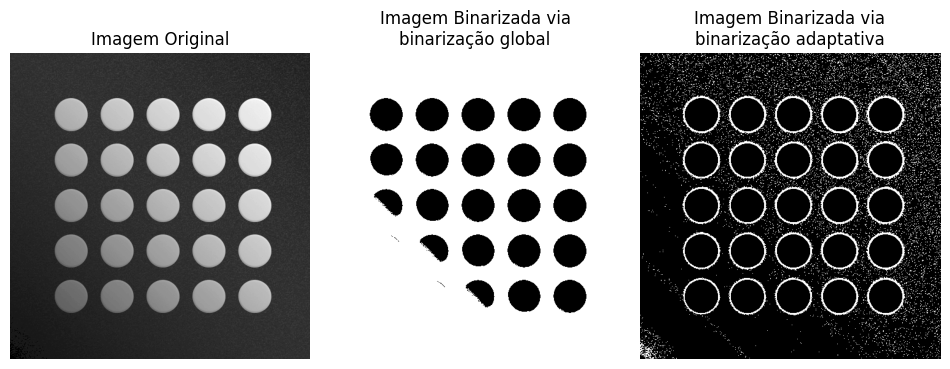

In [13]:
plt.figure(figsize=(12, 5))

plot_image(img, "Imagem Original", 1, 3, 1)
plot_image(img_binarizada_global, "Imagem Binarizada via\nbinarização global", 1, 3, 2)
plot_image(img_binarizada_adaptativa, "Imagem Binarizada via\nbinarização adaptativa", 1, 3, 3)

plt.subplots_adjust(wspace=0.05)
plt.show()

#### Exercício: Comparando Métodos de Binarização

Carregue a imagem "sudoku_2.png", converta-a para escala de cinza e aplique dois métodos de binarização:

* Binarização Global: Utilize um limiar fixo para segmentar a imagem.
* Binarização Adaptativa: Aplique a binarização adaptativa para lidar com variações de iluminação.

Exiba as imagens resultantes e compare os métodos utilizados. 🚀

In [14]:
img = cv2.imread(img_path("sudoku_2.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th, img_binarizada_global = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

img_binarizada_adaptativa = cv2.adaptiveThreshold(
    img_gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 5
)

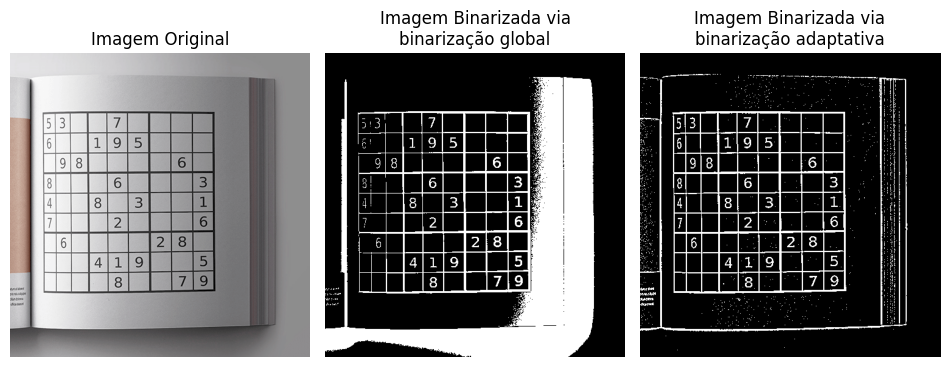

In [15]:
plt.figure(figsize=(12, 5))

plot_image(img, "Imagem Original", 1, 3, 1, False)
plot_image(img_binarizada_global, "Imagem Binarizada via\nbinarização global", 1, 3, 2)
plot_image(img_binarizada_adaptativa, "Imagem Binarizada via\nbinarização adaptativa", 1, 3, 3)

plt.subplots_adjust(wspace=0.05)
plt.show()

#### Desafio: Implementando a Binarização Adaptativa

Implemente um código que carregue a imagem `"comprimidos.jpeg"`, realize a binarização adaptativa e exiba o resultado. Para melhorar a qualidade da segmentação, utilize um filtro de mediana antes da binarização.

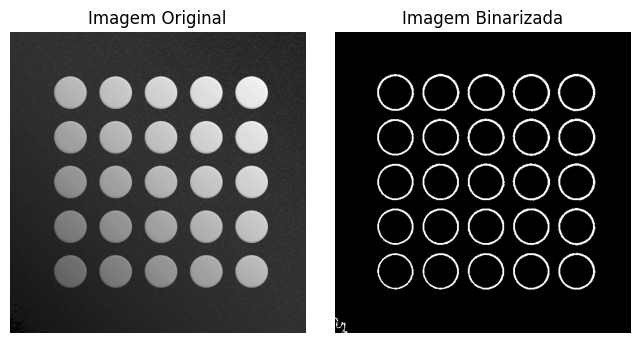

In [16]:
img = cv2.imread(img_path('comprimidos.png'), 0)

img_tratada = cv2.medianBlur(img, 7)

img_binarizada = cv2.adaptiveThreshold(
    img_tratada, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 11, 5
)

plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Imagem Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_binarizada, cmap='gray')
plt.title("Imagem Binarizada")
plt.axis('off')

plt.subplots_adjust(wspace=0.1)
plt.show()

### Binarização OTSU

O método de Otsu automatiza a escolha do limiar ideal, analisando o histograma da imagem e escolhendo um valor que maximize a separação entre os pixels do objeto e do fundo.

Para usar o método de Otsu com a função `cv2.threshold`, basta adicionar `cv2.THRESH_OTSU` ao tipo de limiar:

In [17]:
img = cv2.imread(img_path("graos_de_cafe.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th, img_binarizada = cv2.threshold(
    img_gray, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)

In [18]:
th

150.0

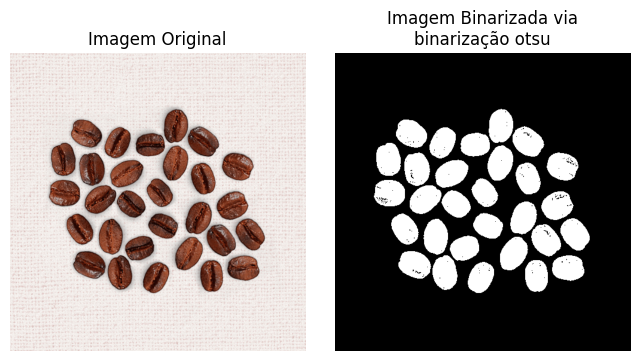

In [19]:
plt.figure(figsize=(8, 5))

plot_image(img, "Imagem Original", 1, 2, 1)
plot_image(img_binarizada, "Imagem Binarizada via\nbinarização otsu", 1, 2, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

## Segmentação por cor

A segmentação por cor é uma técnica amplamente utilizada em processamento de imagens para identificar e separar regiões de interesse baseadas em suas cores. O espaço de cores HSV é frequentemente empregado nesse tipo de segmentação, pois representa a matiz (cor), a saturação e o valor (brilho) de forma independente.

O espaço HSV facilita a segmentação por cor ao concentrar as informações de matiz em um único canal, permitindo definir intervalos de cor mais precisos.

----------

**Uso do método cv2.inRange para segmentação**

A biblioteca OpenCV oferece a função inRange para realizar a segmentação por cor. Essa função recebe como entrada:
* Uma imagem no espaço HSV.
* Um vetor com os valores do limite inferior da cor desejada.
* Um vetor com os valores do limite superior da cor desejada.


In [21]:
verde_rgb = np.uint8([[[0, 255, 0]]])
verde_hsv = cv2.cvtColor(verde_rgb, cv2.COLOR_RGB2HSV)
print(verde_hsv)

[[[ 60 255 255]]]


In [22]:
verde_hsv.ravel()[0]

np.uint8(60)

In [24]:
h, s, v = verde_hsv[0][0].astype(int)
h, s, v

(np.int64(60), np.int64(255), np.int64(255))

Para definir os limites de segmentação, podemos ajustar o canal de matiz somando e subtraindo um valor, normalmente 20 unidades.

In [25]:
limite_inferior = np.array([h-20, 100, 100])
limite_superior = np.array([h+20, 255, 255])

print(f"limite_inferior: {limite_inferior}")
print(f"limite_superior: {limite_superior}")

limite_inferior: [ 40 100 100]
limite_superior: [ 80 255 255]


### Exercício:
Desenvolva uma função chamada calcular_limites_cor_hsv que receba como entrada um array de uma cor específica no formato RGB e retorne os limites inferior e superior dessa cor no espaço HSV.

In [ ]:
def calcular_limites_cor_hsv():
    pass

### Caso Específico da cor Vermelha

* Na teoria das cores, o vermelho puro tem um valor de matiz próximo de 0° (360° também é vermelho, pois o círculo se fecha). No OpenCV, isso significa que a matiz para o vermelho está dividida em dois extremos da escala HSV:
    * Parte Superior: 160 a 179 
    * Parte Inferior: 0 a 20
* Quando queremos segmentar o vermelho, precisamos considerar essa divisão, pois uma única faixa contínua de matiz não cobre toda a gama de tons vermelhos.

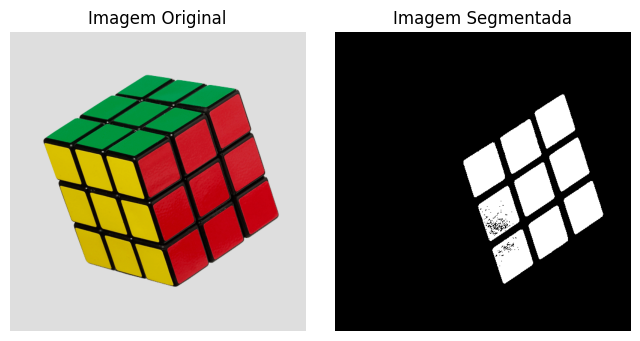

In [ ]:
img_rgb = cv2.imread(img_path("cubo_magico.png"))
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

limite_inferior = np.array([160, 100, 100])
limite_superior = np.array([179, 255, 255])

img_segmentada = cv2.inRange(
    img_hsv,
    limite_inferior,
    limite_superior
)

plt.figure(figsize=(8, 5))

plot_image(img_rgb, "Imagem Original", 1, 2, 1)
plot_image(img_segmentada, "Imagem Segmentada", 1, 2, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

O OpenCV não trata automaticamente essa discontinuidade no HSV, então precisamos manualmente definir dois intervalos e combiná-los. Então é necessário verificar se h_min e h_max cruzam o limite de 0 ou 179.

* Se H estiver dentro de um único intervalo:
    * Retornamos apenas um par (limite_inferior, limite_superior).
* Se H atravessar o limite do espaço HSV:
    * Dividimos o intervalo em duas faixas separadas:
        * Do valor mínimo até 179
        * De 0 até o valor máximo

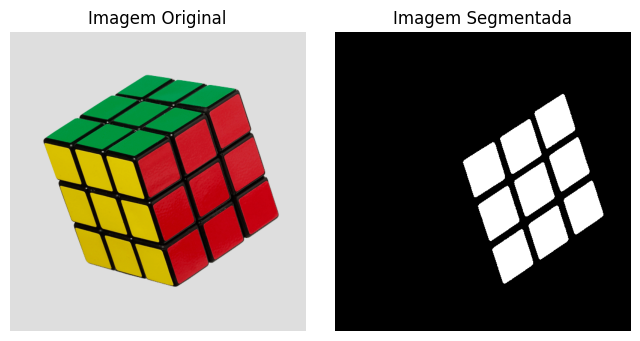

In [26]:
img_rgb = cv2.imread(img_path("cubo_magico.png"))
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

limite_inferior_1 = np.array([160, 100, 100])
limite_superior_1 = np.array([180, 255, 255])

limite_inferior_2 = np.array([0, 100, 100])
limite_superior_2 = np.array([20, 255, 255])

img_segmentada_1 = cv2.inRange(
    img_hsv,
    limite_inferior_1,
    limite_superior_1
)

img_segmentada_2 = cv2.inRange(
    img_hsv,
    limite_inferior_2,
    limite_superior_2
)

img_segmentada = cv2.bitwise_or(img_segmentada_1, img_segmentada_2)

plt.figure(figsize=(8, 5))

plot_image(img_rgb, "Imagem Original", 1, 2, 1)
plot_image(img_segmentada, "Imagem Segmentada", 1, 2, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

### Exercício

Desenvolva uma função chamada calcular_limites_cor_hsv que receba como entrada um array de uma cor específica no formato RGB e retorne os limites inferior e superior dessa cor no espaço HSV.

**Requisitos:**
* A função deve converter a cor RGB para HSV.
* O limite inferior deve ser calculado subtraindo 20 ao valor de matiz (H), mantendo a saturação (S) e o valor (V) em 100.
* O limite superior deve ser calculado somando 20 ao valor de matiz (H), com saturação (S) e valor (V) igual a 255.
* A função deve retornar dois arrays: o primeiro representando o limite inferior da cor, e o segundo o limite superior da cor no espaço HSV.

In [31]:
def calcular_limites_cor_hsv(cor_rgb):
    cor_hsv = cv2.cvtColor(cor_rgb, cv2.COLOR_RGB2HSV)
    h, s, v = cor_hsv[0][0]

    # Limites fixos para S e V
    s_min, s_max = 100, 255
    v_min, v_max = 100, 255

    # Calcula os limites de H com margem circular
    h = int(h)
    h_min = h - 20
    h_max = h + 20

    # Ajustar se ultrapassar os limites do OpenCV (0-179)
    if h_min < 0:
        h_min += 180
    if h_max > 179:
        h_max -= 180

    if h_min < h_max:
        limite_inferior = np.array([h_min, s_min, v_min])
        limite_superior = np.array([h_max, s_max, v_max])
    else:
        # Se o intervalo for dividido
        # Ex.: H = 175 +- 20 -> [155, 195] -> [155, 179] e [0, 15]
        limite_inferior_1 = np.array([h_min, s_min, v_min])
        limite_superior_1 = np.array([179, s_max, v_max])
        limite_inferior_2 = np.array([0, s_min, v_min])
        limite_superior_2 = np.array([h_max, s_max, v_max])

        return (limite_inferior_1, limite_superior_1), (limite_inferior_2, limite_superior_2)

    return limite_inferior, limite_superior

**Tabela de Cores e seus Limites no Espaço HSV**

| Cor       | Limite Inferior (HSV) | Limite Superior (HSV) |
|-----------|----------------------|----------------------|
| Amarelo   | [10, 100, 100]       | [50, 255, 255]     |
| Azul      | [100, 100, 100]      | [140, 255, 255]    |
| Verde     | [40, 100, 100]       | [80, 255, 255]     |




In [32]:
cores = ["Amarelo", "Azul", "Verde"]
cores_rgb = [
    np.uint8([[[255, 255, 0]]]),
    np.uint8([[[0, 0, 255]]]),
    np.uint8([[[0, 255, 0]]])
]

for cor, cor_rgb in zip(cores, cores_rgb):

    cor_hsv = cv2.cvtColor(cor_rgb, cv2.COLOR_RGB2HSV)
    limite_inferior, limite_superior = calcular_limites_cor_hsv(cor_rgb=cor_rgb)

    print("Cor:", cor)
    print("RGB:", cor_rgb)
    print("HSV:", cor_hsv)
    print("Limites cor HSV:")
    print("* Limite Inferior:", limite_inferior)
    print("* Limite Superior:", limite_superior)
    print()

Cor: Amarelo
RGB: [[[255 255   0]]]
HSV: [[[ 30 255 255]]]
Limites cor HSV:
* Limite Inferior: [ 10 100 100]
* Limite Superior: [ 50 255 255]

Cor: Azul
RGB: [[[  0   0 255]]]
HSV: [[[120 255 255]]]
Limites cor HSV:
* Limite Inferior: [100 100 100]
* Limite Superior: [140 255 255]

Cor: Verde
RGB: [[[  0 255   0]]]
HSV: [[[ 60 255 255]]]
Limites cor HSV:
* Limite Inferior: [ 40 100 100]
* Limite Superior: [ 80 255 255]



In [33]:
def segmentacao_cor(img_rgb, cor_rgb):
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

    # Obter os limites de segmentação
    limites = calcular_limites_cor_hsv(cor_rgb)

    # Aplica a segmnetação
    if isinstance(limites[0], np.ndarray):
        img_segmentada = cv2.inRange(img_hsv, limites[0], limites[1])
    else:
        img_segmentada_1 = cv2.inRange(img_hsv, limites[0][0], limites[0][1])
        img_segmentada_2 = cv2.inRange(img_hsv, limites[1][0], limites[1][1])
        img_segmentada = cv2.bitwise_or(img_segmentada_1, img_segmentada_2)

    return img_segmentada

In [34]:
img_rgb = cv2.imread(img_path("cubo_magico.png"))
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)

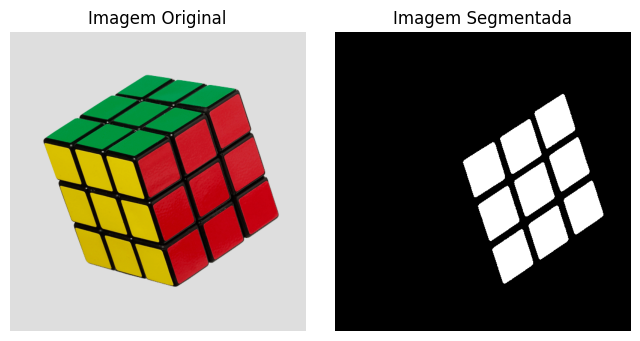

In [35]:
cor_rgb = np.uint8([[[255, 0, 0]]])

img_segmentada = segmentacao_cor(img_rgb, cor_rgb)

plt.figure(figsize=(8, 5))

plot_image(img_rgb, "Imagem Original", 1, 2, 1)
plot_image(img_segmentada, "Imagem Segmentada", 1, 2, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

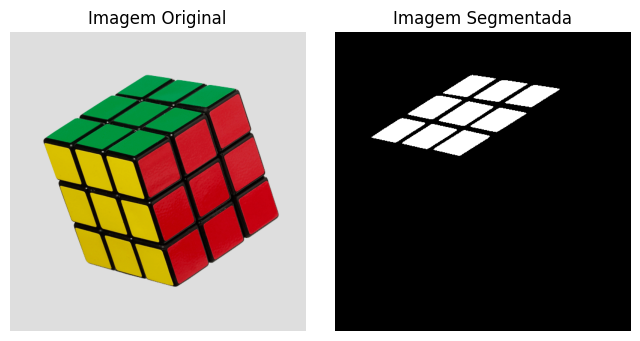

In [36]:
cor_rgb = np.uint8([[[0, 255, 0]]])

img_segmentada = segmentacao_cor(img_rgb, cor_rgb)

plt.figure(figsize=(8, 5))

plot_image(img_rgb, "Imagem Original", 1, 2, 1)
plot_image(img_segmentada, "Imagem Segmentada", 1, 2, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

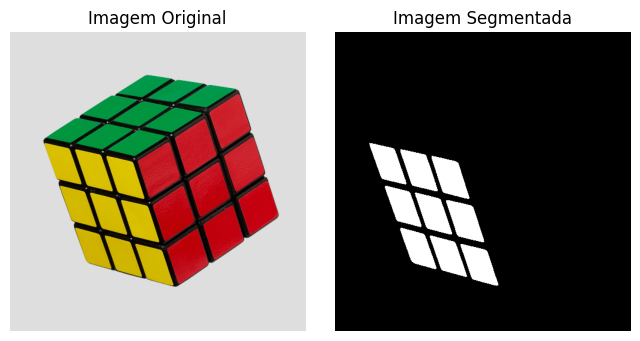

In [37]:
cor_rgb = np.uint8([[[255, 255, 0]]])

img_segmentada = segmentacao_cor(img_rgb, cor_rgb)

plt.figure(figsize=(8, 5))

plot_image(img_rgb, "Imagem Original", 1, 2, 1)
plot_image(img_segmentada, "Imagem Segmentada", 1, 2, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

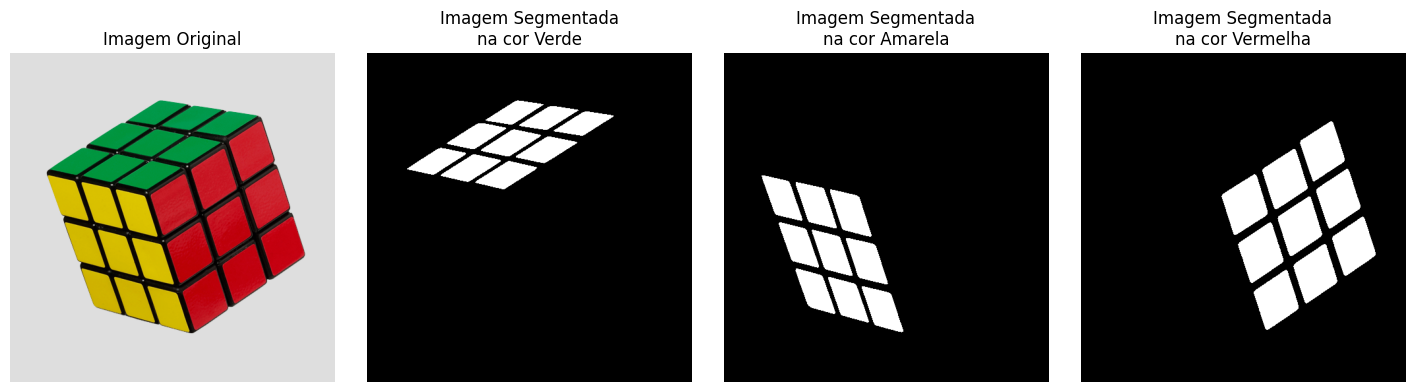

In [38]:
cores = ["Verde", "Amarela", "Vermelha"]

cores_rgb = [
    np.uint8([[[0, 255, 0]]]),
    np.uint8([[[255, 255, 0]]]),
    np.uint8([[[255, 0, 0]]])
]

plt.figure(figsize=(18, 5))

plot_image(img_rgb, "Imagem Original", 1, 4, 1)

for i, (cor, cor_rgb) in enumerate(zip(cores, cores_rgb), 2):

    img_segmentada = segmentacao_cor(img_rgb, cor_rgb)

    plot_image(img_segmentada, f"Imagem Segmentada\nna cor {cor}", 1, 4, i)

plt.subplots_adjust(wspace=0.1)
plt.show()

## Segmentação de Bordas

A segmentação por bordas é um método utilizado para identificar os contornos dos objetos em uma imagem. O detector de bordas Canny é um dos mais eficientes para esse tipo de tarefa. Ele opera em diferentes etapas para garantir uma segmentação precisa, reduzindo ruídos e preservando as bordas principais.

**Processo de Segmentação por Bordas**

* Conversão para Tons de Cinza: A imagem original é convertida para escala de cinza para simplificar o processamento.
* Binarização: Aplica-se um limiar para segmentar os pixels de interesse.
* Operações Morfológicas: São aplicadas operações de fechamento e erosão para remover ruídos e refinar a segmentação.
* Detecção de Bordas com Canny: O algoritmo de Canny é usado para destacar os contornos dos objetos.

In [39]:
img = cv2.imread(img_path("graos_de_cafe.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Conversão para tons de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Binarização
th, img_binarizada = cv2.threshold(img_gray, None, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Operações Morfológicas
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
img_tratada = cv2.morphologyEx(img_binarizada, cv2.MORPH_CLOSE, kernel, iterations=1)
img_tratada = cv2.erode(img_tratada, kernel, iterations=1)

# Detecção de bordas com Canny
img_segmentada = cv2.Canny(img_tratada, 100, 200)

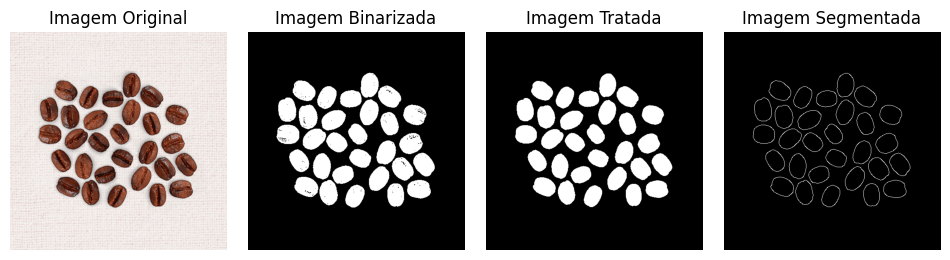

In [40]:
plt.figure(figsize=(12, 5))

plot_image(img, "Imagem Original", 1, 4, 1)
plot_image(img_binarizada, "Imagem Binarizada", 1, 4, 2)
plot_image(img_tratada, "Imagem Tratada", 1, 4, 3)
plot_image(img_segmentada, "Imagem Segmentada", 1, 4, 4)

plt.subplots_adjust(wspace=0.1)
plt.show()

## Segmentação por Movimento

A segmentação por movimento é um método que detecta alterações entre duas imagens capturadas em momentos diferentes. Esse processo é muito utilizado em monitoramento e rastreamento de objetos.

**Processo de Segmentação por Movimento**

* Captura de Duas Imagens: Uma imagem antes da movimentação e outra após.
* Subtração das Imagens: Os pixels que permaneceram inalterados são removidos, restando apenas os objetos que se moveram.
* Conversão para HSV e Segmentação por Cor: Aplica-se a conversão para HSV e a segmentação para isolar o objeto em movimento.
* Operações Morfológicas: São utilizadas para refinar a segmentação e remover ruídos.

In [41]:
img_1 = cv2.imread(img_path("captura_de_movimento_1.png"))
img_2 = cv2.imread(img_path("captura_de_movimento_2.png"))[:, :-2, :]

img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

img_1.shape, img_2.shape

((500, 489, 3), (500, 489, 3))

In [42]:
# Subtração entre as imagens
img_diff = cv2.subtract(img_2, img_1)
img_diff.shape

(500, 489, 3)

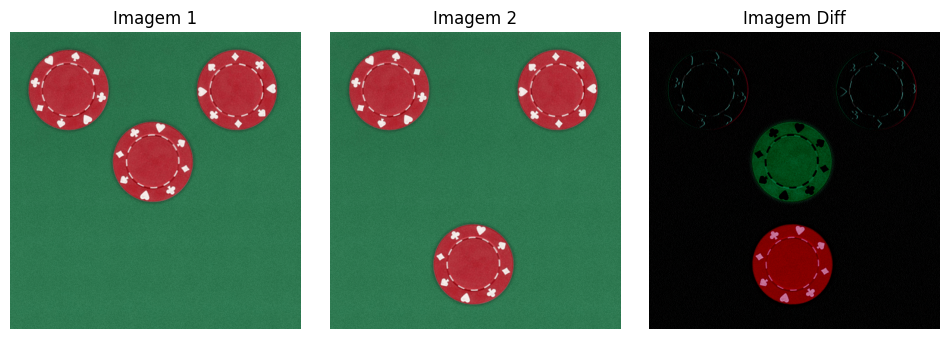

In [43]:
plt.figure(figsize=(12, 5))

ncol = 3

plot_image(img_1, "Imagem 1", 1, ncol, 1)
plot_image(img_2, "Imagem 2", 1, ncol, 2)
plot_image(img_diff, "Imagem Diff", 1, ncol, 3)

plt.subplots_adjust(wspace=0.1)
plt.show()

In [44]:
img_hsv = cv2.cvtColor(img_diff, cv2.COLOR_RGB2HSV)

limite_inferior = np.array([0, 100, 100])
limite_superior = np.array([179, 255, 255])

img_segmentada = cv2.inRange(img_hsv, limite_inferior, limite_superior)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
img_tratada = cv2.morphologyEx(img_segmentada, cv2.MORPH_CLOSE, kernel, iterations=1)
img_tratada = cv2.erode(img_tratada, kernel, iterations=1)

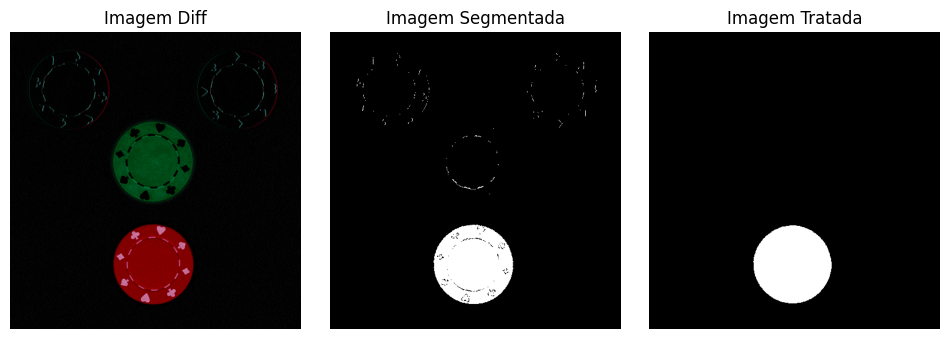

In [45]:
plt.figure(figsize=(12, 5))

ncol = 3

plot_image(img_diff, "Imagem Diff", 1, ncol, 1)
plot_image(img_segmentada, "Imagem Segmentada", 1, ncol, 2)
plot_image(img_tratada, "Imagem Tratada", 1, ncol, 3)

plt.subplots_adjust(wspace=0.1)
plt.show()

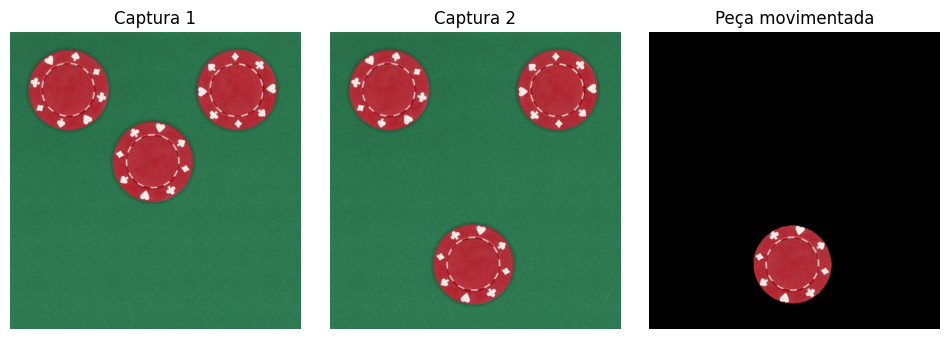

In [46]:
img_movimento = cv2.bitwise_and(img_2, img_2, mask=img_tratada)

plt.figure(figsize=(12, 5))

ncol = 3

plot_image(img_1, "Captura 1", 1, ncol, 1)
plot_image(img_2, "Captura 2", 1, ncol, 2)
plot_image(img_movimento, "Peça movimentada", 1, ncol, 3)

plt.subplots_adjust(wspace=0.1)
plt.show()

# Contornos

Contornos podem ser vistos como curvas que une todos os pontos ao longo da borda de uma determinada forma em uma imagem. Como eles definem os limites dos objetos, a análise desses pontos pode revelar informações essenciais para a **análise de forma, detecção e reconhecimento de objetos**.

A biblioteca OpenCV oferece diversas funções para detectar e processar contornos de forma eficiente. Antes de explorar essas funções, é importante compreender a estrutura de um contorno amostral.

In [4]:
def get_one_contour():
    """Retorna um contorno fixo"""
    cnts = [np.array([
        [[600, 320]], [[563, 460]], [[460, 562]], [[320, 600]],
        [[180, 563]],[[78, 460]], [[40, 320]], [[77, 180]],
        [[179, 78]], [[319, 40]], [[459, 77]], [[562, 179]]
    ], dtype=np.int32)]
    return cnts

In [5]:
contours = get_one_contour()
print("Contornos detectados: '{}'".format(len(contours)))
print("Formato do contorno: '{}'".format(contours[0].shape))

Contornos detectados: '1'
Formato do contorno: '(12, 1, 2)'


In [6]:
def draw_contour_points(img, cnts, color, size=10):
    """Desenha todos os pontos de uma lista de contornos"""
    for cnt in cnts:
        squeeze = np.squeeze(cnt)
        for p in squeeze:
            p = tuple(p)
            cv2.circle(img, p, size, color, -1)
    return img

## Desenhando Contornos

O OpenCV fornece a função `cv2.drawContours()`, que desenha o contorna na imagem. 

```python
cv2.drawContours(
    img, 
    contours,
    contourIdx,
    color,
    thickness
)
```

**contourIdx**: corresponde ao índice de contornos (útil ao desenhar contornos individuais. Para desenhar todos os contornos, passe -1) 


In [7]:
img = np.zeros((650, 650, 3), dtype=np.uint8)

img_points = draw_contour_points(img.copy(), contours, (255, 0, 255))
img_draw = cv2.drawContours(img.copy(), contours, -1, (255, 255, 0), 2)

img_points_draw = cv2.drawContours(img_points.copy(), contours, -1, (255, 255, 0), 2)

In [8]:
plt.figure(figsize=(12, 5))

ncol = 3

plot_image(img_points, "Pontos", 1, ncol, 1)
plot_image(img_draw, "Contornos", 1, ncol, 2)
plot_image(img_points_draw, "Pontos e Contornos", 1, ncol, 3)

plt.subplots_adjust(wspace=0.1)
plt.show()

NameError: name 'plot_image' is not defined

<Figure size 1200x500 with 0 Axes>

## Detecção de Contornos

A função `cv2.findContours()` é responsável por identificar contornos em imagens binárias:

```python
countours, hierarchy = cv2.findContours(img, modos, metodo)
```

Os modos de detecção incluem:
* cv2.RETR_EXTERNAL: Retorna apenas os contornos externos.
* cv2.RETR_LIST: Retorna todos os contornos sem hierarquia.
* cv2.RETR_TREE: Retorna todos os contornos e estabelece relações hierárquicas.

A estrutura **hierarchy** armazena informações sobre as relações entre os contornos, incluindo:
* Próximo contorno no mesmo nível 
* Contorno anterior no mesmo nível
* Primeiro contorno filho
* Contorno pai

Os contornos podem conter muitos pontos desnecessários. O OpenCV fornece diferentes métodos para reduzi-los:
* `cv2.CHAIN_APPROX_NONE`: Mantém todos os pontos do contorno.
* `cv2.CHAIN_APPROX_SIMPLE`: Remove pontos redundantes e armazena apenas os vértices.
* `cv2.CHAIN_APPROX_TC89_L1` e `cv2.CHAIN_APPROX_TC89_KCOS`: Utilizam o algoritmo Teh-Chin para uma compressão baseada em curvatura.


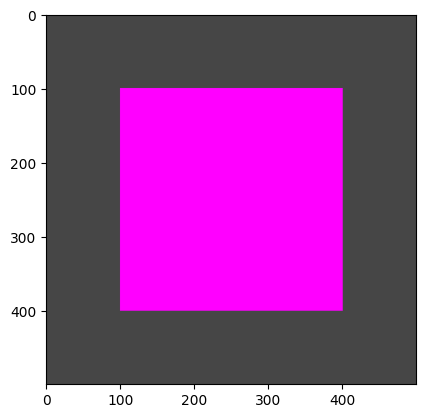

In [12]:
img = np.ones((500,500,3), dtype="uint8") * 70
cv2.rectangle(img, (100,100), (400,400), (255,0,255), -1)

plt.imshow(img)
plt.show()

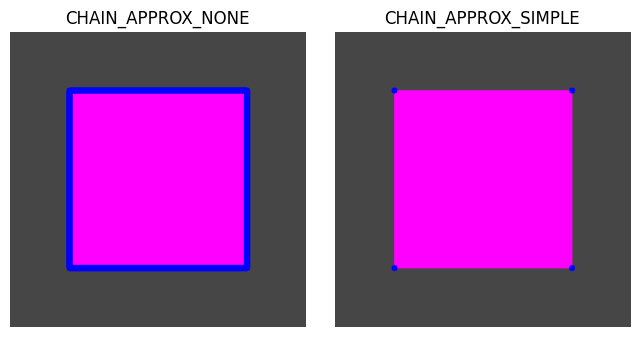

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_binary = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY)[1]

countours_1, hierarchy_1 = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
countours_2, hierarchy_2 = cv2.findContours(img_binary, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img_draw_1 = img.copy()
img_draw_2 = img.copy()

draw_contour_points(img_draw_1, countours_1, (0, 0, 255), 5)
draw_contour_points(img_draw_2, countours_2, (0, 0, 255), 5)

plt.figure(figsize=(8, 5))

plot_image(img_draw_1, "CHAIN_APPROX_NONE", 1, 2, 1)
plot_image(img_draw_2, "CHAIN_APPROX_SIMPLE", 1, 2, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

### Execício prático

In [52]:
def build_sample_image():
    """Constrói uma imagem de exemplo com formas básicas"""
    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)
    return img

def build_sample_image_2():
    """Constrói uma imagem de exemplo com formas básicas e contornos internos"""
    img = np.ones((500, 500, 3), dtype="uint8") * 70
    cv2.rectangle(img, (100, 100), (300, 300), (255, 0, 255), -1)
    cv2.rectangle(img, (150, 150), (250, 250), (70, 70, 70), -1)
    cv2.circle(img, (400, 400), 100, (255, 255, 0), -1)
    cv2.circle(img, (400, 400), 50, (70, 70, 70), -1)
    return img

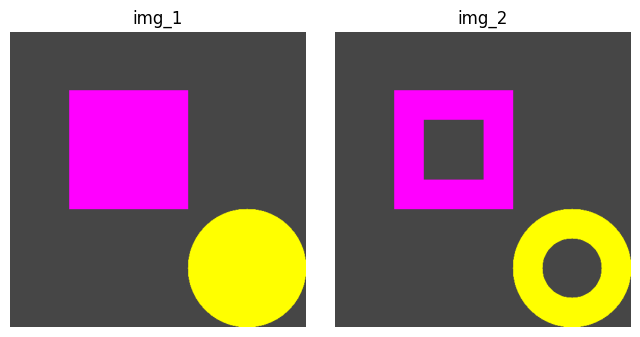

In [53]:
img_1 = build_sample_image()
img_2 = build_sample_image_2()

plt.figure(figsize=(8, 5))

ncol = 2

plot_image(img_1, "img_1", 1, ncol, 1)
plot_image(img_2, "img_2", 1, ncol, 2)

plt.subplots_adjust(wspace=0.1)
plt.show()

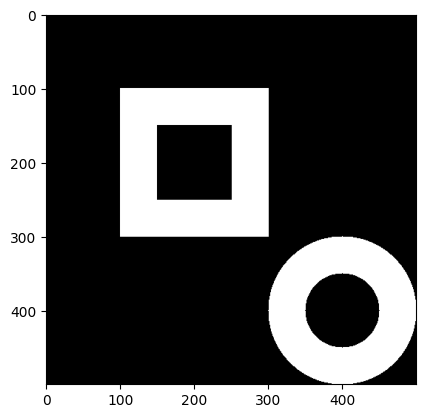

In [54]:
img = build_sample_image_2()

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
th, img_binarizada = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY)

plt.imshow(img_binarizada, cmap='gray')
plt.show()

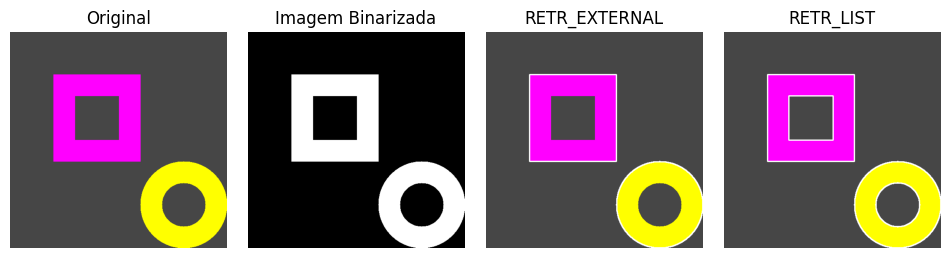

In [ ]:
countours_1, hierarchy_1 = cv2.findContours(img_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
countours_2, hierarchy_2 = cv2.findContours(img_binarizada, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

color = (255, 255, 255)

img_countours_1 = img.copy()
img_countours_2 = img.copy()

cv2.drawContours(img_countours_1, countours_1, -1, color, 2)
cv2.drawContours(img_countours_2, countours_2, -1, color, 2)

plt.figure(figsize=(12, 5))
plot_image(img, "Original", 1, 4, 1)
plot_image(img_binarizada, "Imagem Binarizada", 1, 4, 2)
plot_image(img_countours_1, "RETR_EXTERNAL", 1, 4, 3)
plot_image(img_countours_2, "RETR_LIST", 1, 4, 4)

plt.subplots_adjust(wspace=0.1)
plt.show()

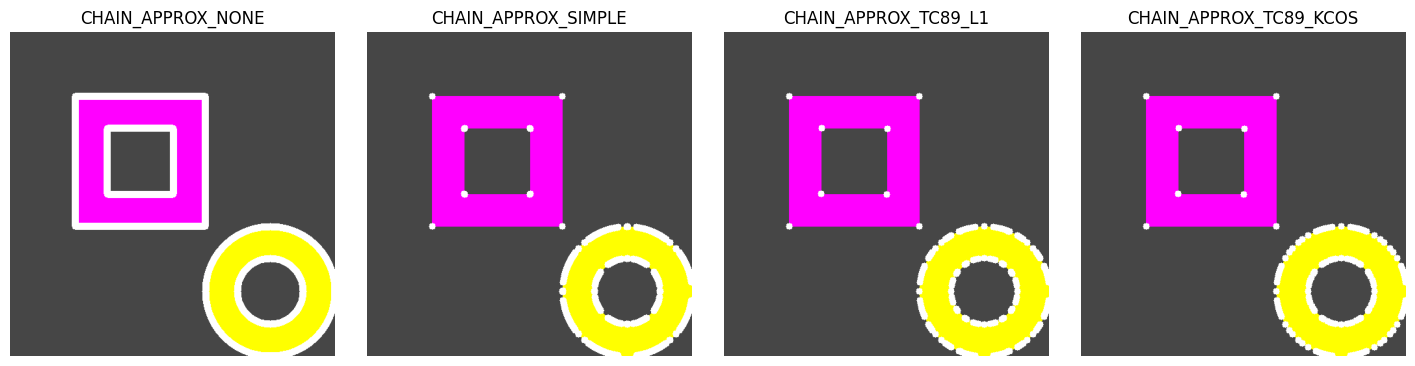

In [ ]:
img = build_sample_image_2()
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
th, img_binarizada = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY)

size_circle = 5
color = (255, 255, 255)

# Create the different images to plot the detected contours:
image_approx_none = img.copy()
image_approx_simple = img.copy()
image_approx_tc89_l1 = img.copy()
image_approx_tc89_kcos = img.copy()

# Find contours using different methods:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv2.findContours(img_binarizada, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours2, hierarchy2 = cv2.findContours(img_binarizada, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours3, hierarchy3 = cv2.findContours(img_binarizada, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_L1)
contours4, hierarchy4 = cv2.findContours(img_binarizada, cv2.RETR_LIST, cv2.CHAIN_APPROX_TC89_KCOS)

# Draw the contours in the previously created images:
draw_contour_points(image_approx_none, contours, color, size_circle)
draw_contour_points(image_approx_simple, contours2, color, size_circle)
draw_contour_points(image_approx_tc89_l1, contours3, color, size_circle)
draw_contour_points(image_approx_tc89_kcos, contours4, color, size_circle)

plt.figure(figsize=(18, 5))

plot_image(image_approx_none, "CHAIN_APPROX_NONE", 1, 4, 1)
plot_image(image_approx_simple, "CHAIN_APPROX_SIMPLE", 1, 4, 2)
plot_image(image_approx_tc89_l1, "CHAIN_APPROX_TC89_L1", 1, 4, 3)
plot_image(image_approx_tc89_kcos, "CHAIN_APPROX_TC89_KCOS", 1, 4, 4)

plt.subplots_adjust(wspace=0.1)
plt.show()

## Funções úteis no OpenCV para contornos

Depois de detectar os contornos, podemos usar funções do OpenCV para descrever melhor cada um deles. Abaixo estão as principais funções explicadas no texto:

detected contours: '1' 


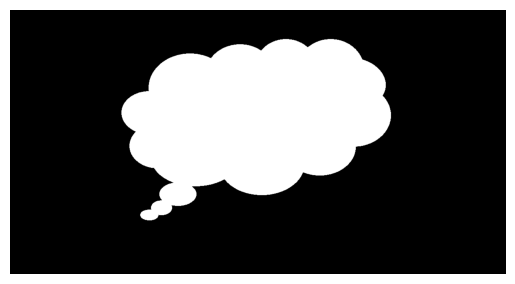

In [59]:
img = cv2.imread(img_path("shape_features.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th, img_binarizada = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("detected contours: '{}' ".format(len(contours)))

plt.imshow(img)
plt.axis("off")
plt.show()

#### `cv2.boundingRect()`
* O que faz: Retorna o menor retângulo "alinhado ao eixo" (sem rotação) que envolve todo o contorno.
* Retorna: x, y, w, h → canto superior esquerdo e dimensões do retângulo.
* Uso: Pode ser usado para recortar o objeto da imagem ou calcular o aspect ratio.

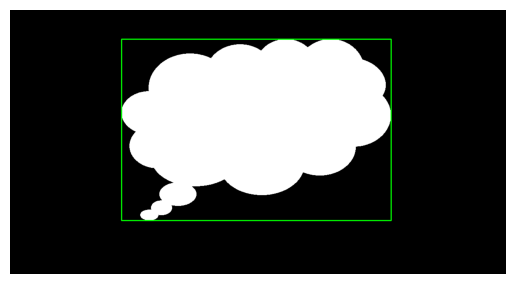

In [60]:
img_bounding_rect = img.copy()

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_bounding_rect, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(img_bounding_rect)
plt.axis("off")
plt.show()

#### `cv2.minAreaRect()`
* O que faz: Retorna o menor retângulo possível, mas agora permitindo rotação.
* Retorna: centro, dimensões e ângulo de rotação.
* Para obter os vértices reais do retângulo, usamos:

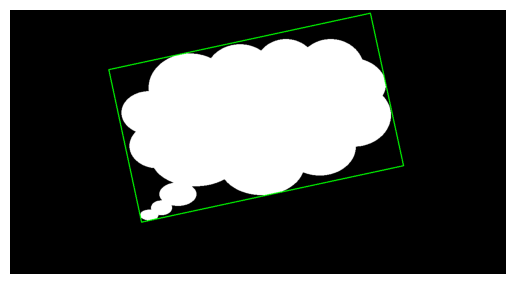

In [61]:
img_minAreaRect = img.copy()

for cnt in contours:
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int32(box)
    cv2.drawContours(img_minAreaRect, [box], 0, (0, 255, 0), 2)

plt.imshow(img_minAreaRect)
plt.axis("off")
plt.show()

#### `cv2.minEnclosingCircle()`
* O que faz: Calcula o menor círculo que envolve completamente o contorno.
* Retorna: centro (x, y) e o raio.
* Uso: Pode ser útil para medir simetria circular ou usar como filtro geométrico.

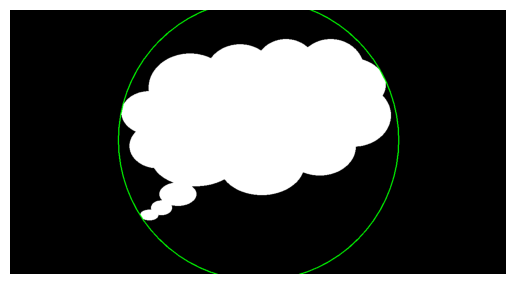

In [62]:
img_minEnclosingCircle = img.copy()

for cnt in contours:
    (x, y), radius = cv2.minEnclosingCircle(cnt)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(img_minEnclosingCircle, center, radius, (0, 255, 0), 2)

plt.imshow(img_minEnclosingCircle)
plt.axis("off")
plt.show()

#### `cv2.fitEllipse()`
* O que faz: Ajusta uma elipse aos pontos do contorno, minimizando o erro quadrático.
* Uso: Ideal para medir excentricidade ou orientação da forma.
* Obs: A elipse só é ajustada se o contorno tiver ao menos 5 pontos.



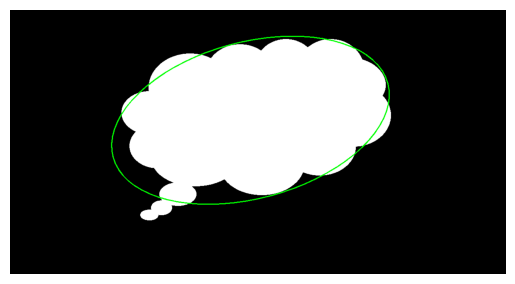

In [63]:
img_fitEllipse = img.copy()

for cnt in contours:
    if len(cnt) >= 5:
        ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(img_fitEllipse, ellipse, (0, 255, 0), 2)

plt.imshow(img_fitEllipse)
plt.axis("off")
plt.show()

#### `cv2.approxPolyDP()`
* O que faz: Aproxima o contorno por uma curva poligonal, reduzindo o número de vértices, com base em um parâmetro epsilon (precisão).
* Uso: Útil para identificar formas geométricas simples (triângulos, quadrados etc.).

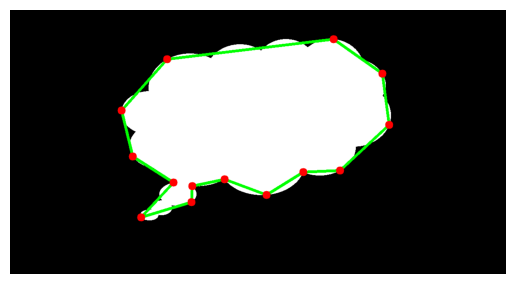

In [64]:
img_approxPolyDP = img.copy()

for cnt in contours:
    epsilon = 0.01 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    cv2.drawContours(img_approxPolyDP, [approx], 0, (0, 255, 0), 5)
    for p in approx:
        cv2.circle(img_approxPolyDP, tuple(p[0]), 10, (255, 0, 0), -1)

plt.imshow(img_approxPolyDP)
plt.axis("off")
plt.show()

#### Pontos extremos do contorno
* A função extreme_points(contour) encontra os pontos mais à esquerda, direita, cima e baixo do contorno.
* Isso é feito usando np.argmin() e np.argmax() sobre as coordenadas x e y.

In [65]:
def extreme_points(contour):
    """Retorna os pontos extremos do contorno"""
    index_min_x = contour[:, :, 0].argmin()
    index_min_y = contour[:, :, 1].argmin()
    index_max_x = contour[:, :, 0].argmax()
    index_max_y = contour[:, :, 1].argmax()

    extreme_left = tuple(contour[index_min_x][0])
    extreme_right = tuple(contour[index_max_x][0])
    extreme_top = tuple(contour[index_min_y][0])
    extreme_bottom = tuple(contour[index_max_y][0])

    return extreme_left, extreme_right, extreme_top, extreme_bottom

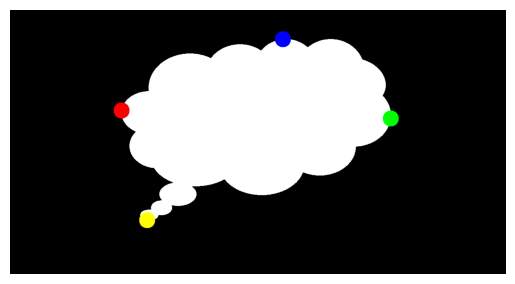

In [66]:
img_extreme_points = img.copy()

for cnt in contours:
    left, right, top, bottom = extreme_points(cnt)
    cv2.circle(img_extreme_points, left, 20, (255, 0, 0), -1)
    cv2.circle(img_extreme_points, right, 20, (0, 255, 0), -1)
    cv2.circle(img_extreme_points, top, 20, (0, 0, 255), -1)
    cv2.circle(img_extreme_points, bottom, 20, (255, 255, 0), -1)

plt.imshow(img_extreme_points)
plt.axis("off")
plt.show()

#### Ordenação de contornos por área
Para ordenar os contornos do maior para o menor (ou vice-versa).

Aqui usamos:
* `cv2.contourArea(contour)` → retorna a área de cada contorno.
* `sorted()` → ordena pela área.
* `zip(*...)` → separa de volta em duas listas (áreas e contornos).

detected contours: '10' 


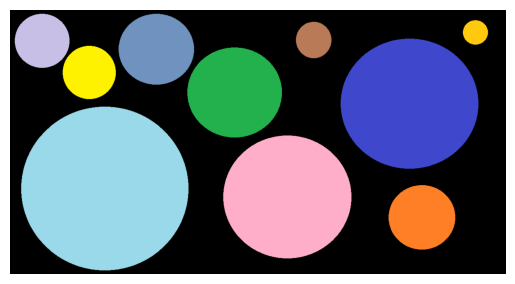

In [68]:
img = cv2.imread(img_path("shapes_sizes.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th, img_binarizada = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(img_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("detected contours: '{}' ".format(len(contours)))

plt.imshow(img)
plt.axis("off")
plt.show()

In [69]:
def get_position_to_draw(text, point, font_face, font_scale, thickness):
    """Gives the coordinates to draw centered"""

    text_size = cv2.getTextSize(text, font_face, font_scale, thickness)[0]
    text_x = point[0] - text_size[0] / 2
    text_y = point[1] + text_size[1] / 2
    return round(text_x), round(text_y)

def sort_contourns_size(contours, reversed=False):
    size_and_conts = [(cv2.contourArea(cnt), cnt) for cnt in contours]
    size_and_conts = sorted(size_and_conts, key=lambda x: x[0], reverse=reversed)
    conts_sizes, conts = zip(*size_and_conts)
    return conts_sizes, conts

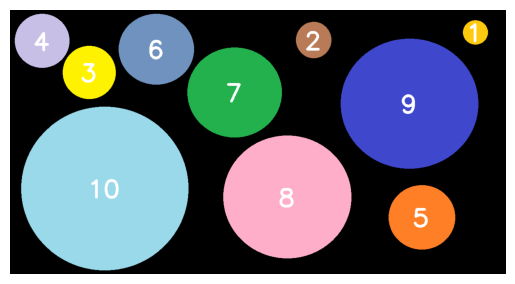

In [70]:
font_scale = 2
thickness = 5

img_sort_contourns_size = img.copy()

contour_sizes, contours = sort_contourns_size(contours)
for i, (cnt, size) in enumerate(zip(contours, contour_sizes), 1):

    M = cv2.moments(cnt)

    cx = int(M["m10"] / M["m00"])
    cy = int(M["m01"] / M["m00"])

    text = str(i)

    x, y = get_position_to_draw(text, (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)

    cv2.putText(img_sort_contourns_size, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

plt.imshow(img_sort_contourns_size)
plt.axis("off")
plt.show()

# Extração de Caracteristicas

## Momentos

Na matemática, um momento é uma medida que descreve certas características de uma forma ou função — por exemplo, sua massa, centro, dispersão, etc. Em visão computacional, usamos os momentos de imagem como ferramentas para extrair informações úteis sobre formas detectadas em uma imagem.

Momentos de imagem podem ser entendidos como médias ponderadas das intensidades dos pixels da imagem (ou de uma forma/contorno). Eles ajudam a capturar propriedades geométricas de objetos na imagem.

Por exemplo, com os momentos, podemos descobrir:
* A área de um objeto.
* O centro de massa (também chamado de centroide).
* Informações relacionadas à orientação, simetria e distribuição dos pixels.


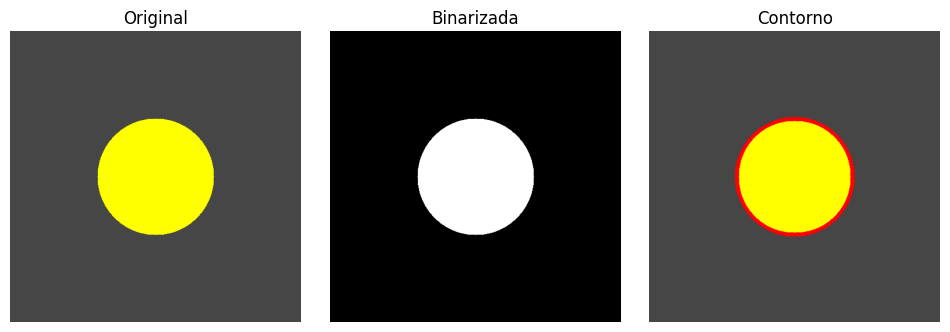

In [17]:
img = np.ones((500, 500, 3), dtype="uint8") * 70
cv2.circle(img, (250, 250), 100, (255, 255, 0), -1)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th, img_binarizada = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY)

countours, hierarchy = cv2.findContours(img_binarizada, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
img_countours = img.copy()
cv2.drawContours(img_countours, countours, -1, (255, 0, 0), 5)

plt.figure(figsize=(12, 5))
plot_image(img, "Original", 1, 3, 1)
plot_image(img_binarizada, "Binarizada", 1, 3, 2)
plot_image(img_countours, "Contorno", 1, 3, 3)
plt.subplots_adjust(wspace=0.1)
plt.show()

A função `cv2.moments()` é usada para calcular todos os momentos até a terceira ordem de uma forma vetorial (como um contorno).

```python
M = cv2.moments(countour)
```

Aqui, contour é, por exemplo, contours[0], o primeiro contorno detectado por `cv2.findContours()`.

| Tipo de Momento | Base de Cálculo | Invariante a | Utilidade principal | 
| ----- | ----- | ----- | ----- | 
| Espacial (m) | Origem da imagem | ✖️ Calcular área, centroide | 
| Centrado (mu) | Centroide do objeto | ✅ posição | Estudar forma sem depender da posição |
| Normalizado (nu) | Escala e centroide considerados | ✅ posição e escala | Comparar formas com tamanhos diferentes |


In [18]:
M = cv2.moments(countours[0])
M

{'m00': 31134.0,
 'm10': 7783500.0,
 'm01': 7783500.0,
 'm20': 2023013223.6666665,
 'm11': 1945875000.0,
 'm02': 2023013223.6666665,
 'm30': 544322417750.0,
 'm21': 505753305916.6667,
 'm12': 505753305916.6667,
 'm03': 544322417750.0,
 'mu20': 77138223.66666651,
 'mu11': 0.0,
 'mu02': 77138223.66666651,
 'mu30': 0.0001220703125,
 'mu21': 6.103515625e-05,
 'mu12': 6.103515625e-05,
 'mu03': 0.0001220703125,
 'nu20': 0.07957924080046662,
 'nu11': 0.0,
 'nu02': 0.07957924080046662,
 'nu30': 7.137115971104531e-16,
 'nu21': 3.5685579855522656e-16,
 'nu12': 3.5685579855522656e-16,
 'nu03': 7.137115971104531e-16}

## Extraindo Características de Objetos

Os momentos de imagem são valores numéricos que descrevem propriedades geométricas de um contorno detectado em uma imagem. Com esses momentos, conseguimos calcular diversas características dos objetos — mesmo que os valores dos momentos por si só não tenham um significado geométrico direto, eles permitem calcular métricas importantes.

### Área do contorno

In [20]:
print(cv2.contourArea(countours[0]))

print(M['m00'])

31134.0
31134.0


### Centroide (centro de massa)

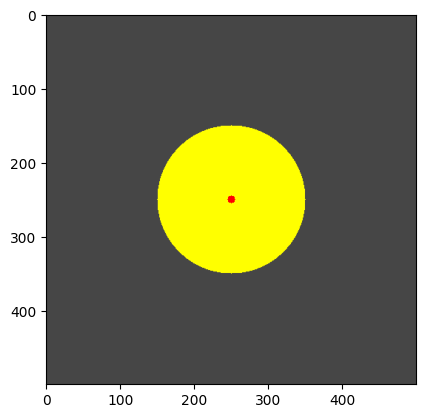

In [25]:
# Coordenada x
cx = int(M['m10'] / M['m00'])
# Coordenada y
cy = int(M['m01'] / M['m00'])

img_draw = img.copy()

cv2.circle(img_draw, (cx, cy), 5, (255, 0, 0), -1)

plt.imshow(img_draw)
plt.show()

### Circularidade do objeto

É uma medida que diz o quão próximo o contorno está de uma círculo perfeito

> k = perimetro^2 / (área * 4 * pi)

* Se o objeto for um circulo perfeito k = 1
* Quanto maior o valor de k, menos circular o objeto é

In [28]:
def roundness(countour, moments):
    lenght = cv2.arcLength(countour, True)
    k = (lenght * lenght) / (moments['m00'] * 4 * np.pi)
    return round(k, 2)

roundness(countour=countours[0], moments=M)

1.12

### Proporção Largura/Altura

In [29]:
def aspect_ratio(contour):
    x, y, w, h = cv2.boundingRect(contour)
    return w / h

In [30]:
aspect_ratio(contour=contours[0])

1.0

In [34]:
x, y, w, h = cv2.boundingRect(countours[0])
x, y, w, h

(150, 150, 201, 201)

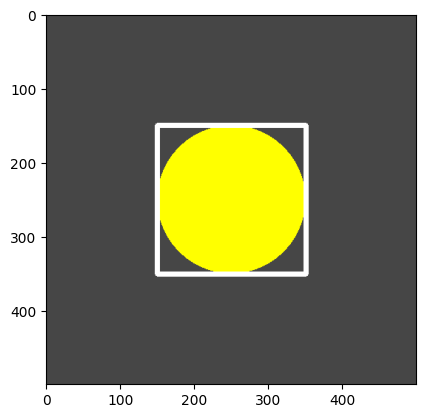

In [35]:
img_draw = img.copy()
cv2.rectangle(img_draw, (x, y), (x+w, y+h), (255, 255, 255), 5)
plt.imshow(img_draw)
plt.show()

## Matching contours

Quando queremos comparar a forma de dois objetos em uma imagem (por exemplo, verificar se dois contornos têm formato semelhante), uma técnica bastante útil é o uso dos Hu Moment Invariants.

**O que são os Hu Moments?**

São 7 valores calculados a partir dos momentos de imagem que são invariantes a rotação, escala e translação. Ou seja, mesmo que a forma esteja girada, redimensionada ou movida, os valores continuam praticamente os mesmos.

O OpenCV fornece a função `cv2.matchShapes()` que usa esses Hu Moments para comparar dois contornos e retornar uma medida de similaridade. 


```python
score = cv2.mathShapes(contourA, contourB, method, 0.0)
```

Métodos de comparação disponíveis:

| Método | Sensível a | Boa escolha para |
| ----- | ------ | ------ |
| `cv2.CONTOURS_MATCH_I1` | Momentos pequenos | Detalhes finos |
| `cv2.CONTOURS_MATCH_I2` | Momentos grandes | Comparação geral |
| `cv2.CONTOURS_MATCH_I3` | Diferenças pontuais | Erros criutícos |


In [36]:
def get_position_to_draw(text, point, font_face, font_scale, thickness):
    """Gives the coordinates to draw centered"""

    text_size = cv2.getTextSize(text, font_face, font_scale, thickness)[0]
    text_x = point[0] - text_size[0] / 2
    text_y = point[1] + text_size[1] / 2
    return round(text_x), round(text_y)

### Desafio prático: Identificando formas semelhantes a um círculo com Hu Moments

Você recebeu uma imagem chamada match_shapes.png, que contém várias formas geométricas diferentes (círculos, triângulos, quadrados, estrelas, etc.). Seu objetivo é utilizar o método cv2.matchShapes() do OpenCV para comparar cada uma dessas formas com um círculo perfeito:

**Tarefa**

* Detectar todos os contornos presentes na imagem match_shapes.png.
* Comparar cada contorno com um círculo de referência utilizando os três métodos de correspondência disponíveis:
    * cv2.CONTOURS_MATCH_I1
    * cv2.CONTOURS_MATCH_I2
    * cv2.CONTOURS_MATCH_I3
* Classificar as formas da imagem em ordem de semelhança com o círculo, ou seja, do contorno mais semelhante ao menos semelhante.
* Gerar uma imagem final com as pontuações de similaridade escritas sobre cada forma.

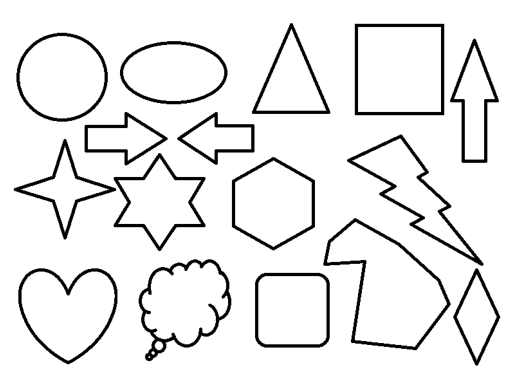

In [39]:
img = cv2.imread(img_path('match_shapes.png'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(img)
plt.axis("off")
plt.show()

detected contours: '16' 


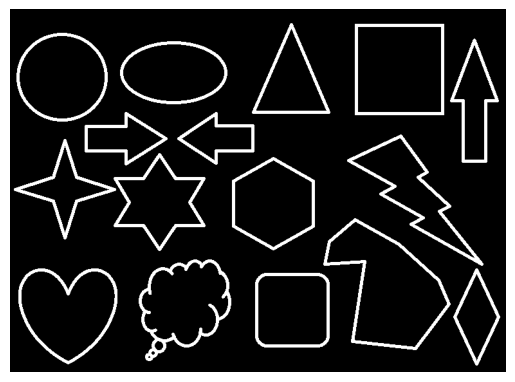

In [41]:
th, img_binarizada = cv2.threshold(img_gray, 50, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy = cv2.findContours(img_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("detected contours: '{}' ".format(len(contours)))

plt.imshow(img_binarizada, cmap='gray')
plt.axis("off")
plt.show()

detected contours: '1' 


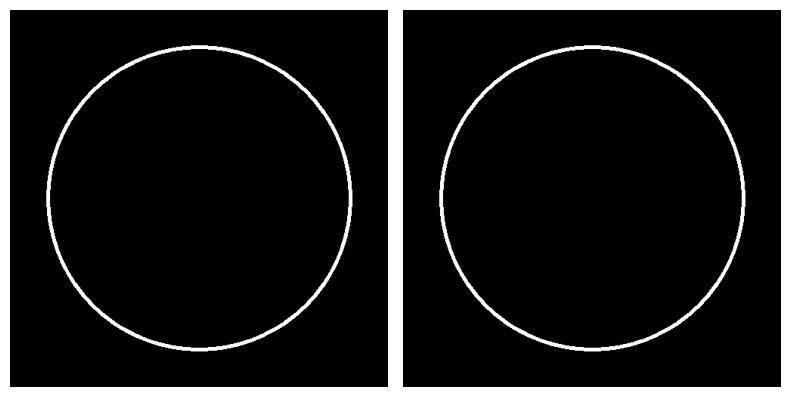

In [42]:
img_circle = np.zeros((500, 500, 3), dtype='uint8')
cv2.circle(img_circle, (250, 250), 200, (255, 255, 255), 3)

img_circle_gray = cv2.cvtColor(img_circle, cv2.COLOR_RGB2GRAY)

th, img_circle_binarizada = cv2.threshold(img_circle_gray, 50, 255, cv2.THRESH_BINARY)

contours_circle, hierarchy_circle = cv2.findContours(img_circle_binarizada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print("detected contours: '{}' ".format(len(contours_circle)))

plt.figure(figsize=(8,5))

plt.subplot(1, 2, 1)
plt.imshow(img_circle)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_circle_binarizada, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

In [43]:
# Copy three images to show the results:
result_1 = img.copy()
result_2 = img.copy()
result_3 = img.copy()

# At this point we compare all the detected contours with the circle contour to get the similarity of the match
for contour in contours:
    # Compute the moment of contour:
    M = cv2.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # We match each contour against the circle contour using the three matching modes:
    ret_1 = cv2.matchShapes(contours_circle[0], contour, cv2.CONTOURS_MATCH_I1, 0.0)
    ret_2 = cv2.matchShapes(contours_circle[0], contour, cv2.CONTOURS_MATCH_I2, 0.0)
    ret_3 = cv2.matchShapes(contours_circle[0], contour, cv2.CONTOURS_MATCH_I3, 0.0)

    # Get the positions to draw:
    (x_1, y_1) = get_position_to_draw(str(round(ret_1, 3)), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
    (x_2, y_2) = get_position_to_draw(str(round(ret_2, 3)), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)
    (x_3, y_3) = get_position_to_draw(str(round(ret_3, 3)), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.2, 3)

    # Write the obtainted scores in the result images:
    cv2.putText(result_1, str(round(ret_1, 3)), (x_1, y_1), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 3)
    cv2.putText(result_2, str(round(ret_2, 3)), (x_2, y_2), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 3)
    cv2.putText(result_3, str(round(ret_3, 3)), (x_3, y_3), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 255), 3)

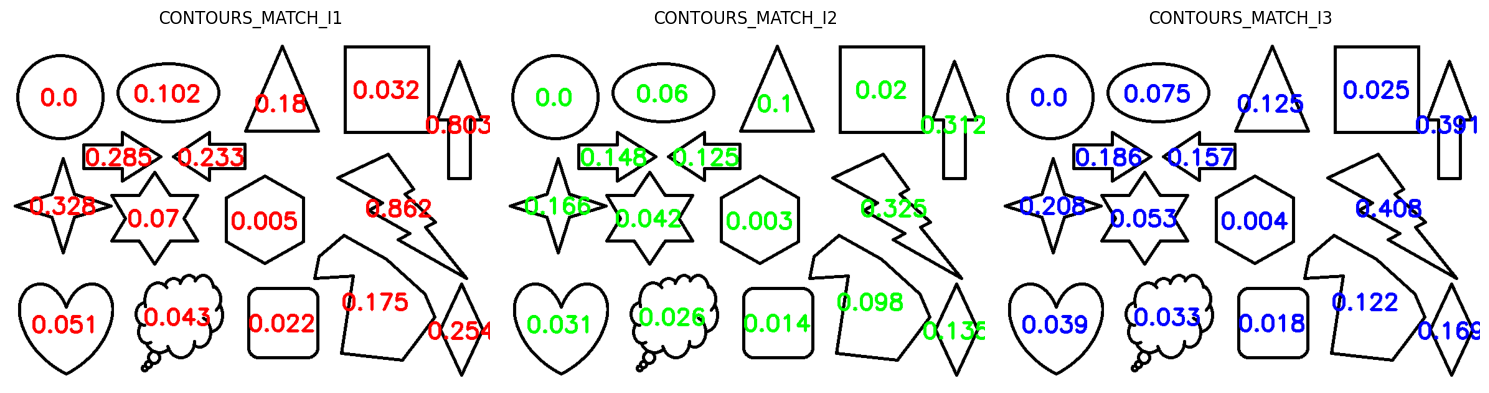

In [44]:
plt.figure(figsize=(15,8))

plt.subplot(1, 3, 1)
plt.imshow(result_1)
plt.title("CONTOURS_MATCH_I1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(result_2)
plt.title("CONTOURS_MATCH_I2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(result_3)
plt.title("CONTOURS_MATCH_I3")
plt.axis("off")

plt.tight_layout()
plt.show()

# Features em Visão Computacional

Em termos simples, uma feature (ou característica) é uma pequena região da imagem que contém informações únicas e importantes, como cantos, bordas ou padrões repetitivos. Essas regiões são úteis porque podemos usá-las para identificar, rastrear ou comparar objetos em diferentes imagens.
Por exemplo, se você tira duas fotos do mesmo objeto em ângulos diferentes, uma boa feature é aquela que aparece nas duas fotos, mesmo com rotação, escala ou iluminação diferentes.

**Algoritmos para detectar features no OpenCV**

* SIFT (Scale-Invariant Feature Transform)
* SURF (Speeded-Up Robust Features)
* ORB (Oriented FAST and Rotated BRIEF)


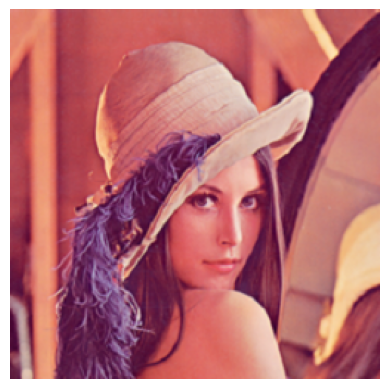

In [45]:
img = cv2.imread(img_path("lenna_250.png"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

## ORB: Uma alternativa eficiente ao SIFT e SURF

O ORB (Oriented FAST and Rotated BRIEF) é uma técnica poderosa e rápida que junta o melhor de dois mundos:

* FAST é usado para detectar os pontos-chave (keypoints).
* BRIEF é usado para gerar os descritores desses pontos.

A combinação resulta em um algoritmo leve, rápido e robusto — ideal para aplicações em tempo real, como realidade aumentada ou SLAM.

**Keypoints**

* São os pontos "interessantes" que o ORB identifica na imagem, como cantos. O ORB usa uma versão modificada do FAST para isso, e ainda calcula a orientação de cada ponto, o que ajuda a manter a robustez mesmo com rotação.

**Descritores**

* Depois de detectar os keypoints, o ORB gera um vetor de números para cada ponto — esse vetor é chamado de descritor, e contém a "assinatura" daquela região da imagem.



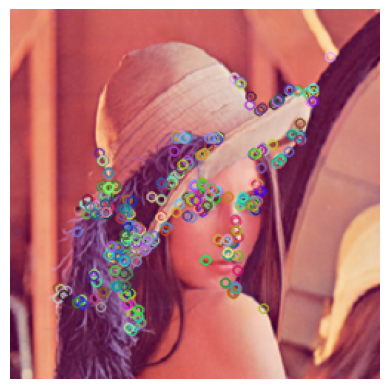

In [46]:
orb = cv2.ORB_create()

keypoints, descriptors = orb.detectAndCompute(img, None)

img_keypoints = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(img_keypoints)
plt.axis("off")
plt.show()

In [47]:
len(keypoints)

440

In [48]:
descriptors[0]

array([ 97, 113,  21,  69,  61,  15,  96,  28, 126, 249,  98,  76, 210,
        16,  16, 176, 152, 108, 122,  76, 205, 248, 121,  60, 133, 186,
        81,  80,  72,  25,  82, 140], dtype=uint8)

### Reconhecimento de Objeto com ORB

**Objetivo:**

Identificar se um objeto (por exemplo, uma caixa de fósforos) está presente em uma imagem de cena mais ampla.

**Requisitos:**

* Uma imagem do objeto (ex: object.jpg)
* Uma imagem da cena (ex: scene.jpg), que pode ou não conter o objeto

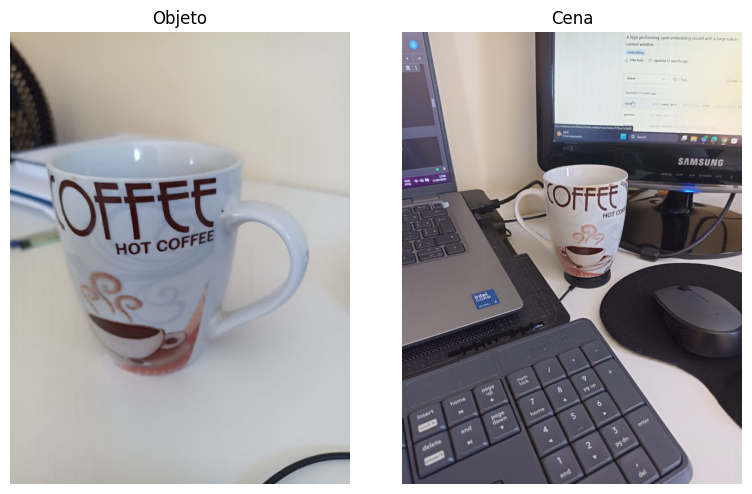

In [49]:
# Imagem do objeto
img_objeto = cv2.imread(img_path("coffe_1.jpeg"))
img_objeto = cv2.cvtColor(img_objeto, cv2.COLOR_BGR2RGB)
img_objeto_gray = cv2.cvtColor(img_objeto, cv2.COLOR_RGB2GRAY)

# Imagem da cena que poe ou não conter o objeto
img_cena = cv2.imread(img_path("coffe_2.jpeg"))
# img_cena = cv2.imread("coffe_3.jpeg")
# img_cena = cv2.imread("image_exemplo_segementacao.jpeg")
img_cena = cv2.cvtColor(img_cena, cv2.COLOR_BGR2RGB)
img_cena_gray = cv2.cvtColor(img_cena, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(8,5))
plot_image(img_objeto, "Objeto", 1, 2, 1)
plot_image(img_cena, "Cena", 1, 2, 2)
plt.tight_layout()
plt.show()

#### ORB

In [52]:
# Inicializa o ORB
orb = cv2.ORB_create()

# Detecta keypoints e descritores
kp1, des1 = orb.detectAndCompute(img_objeto_gray, None)
kp2, des2 = orb.detectAndCompute(img_cena_gray, None)

#### Feature Matcing

In [53]:
def object_match_verification(good_matchs, min_math_count=5):
    if len(good_matchs) > min_math_count:
        print("✅ Objeto detectado via Feature Matching.")
    else:
        print("❌ Objeto não detectado.")

##### Brute-Force Matcher (BFMatcher)

* É o método mais direto: compara cada descritor de uma imagem com todos os da outra imagem.
* Retorna o par com menor distância (mais parecido).


In [54]:
# Match usando Hamming
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
knn_matches = bf.knnMatch(des1, des2, k=2)

# Aplica o Ratio Test
good_matches = []
for m, n in knn_matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

result = cv2.drawMatches(img_objeto, kp1, img_cena, kp2, good_matches, None,
                         matchColor=(255,255,0), singlePointColor=(255,0,255))

✅ Objeto detectado via Feature Matching.


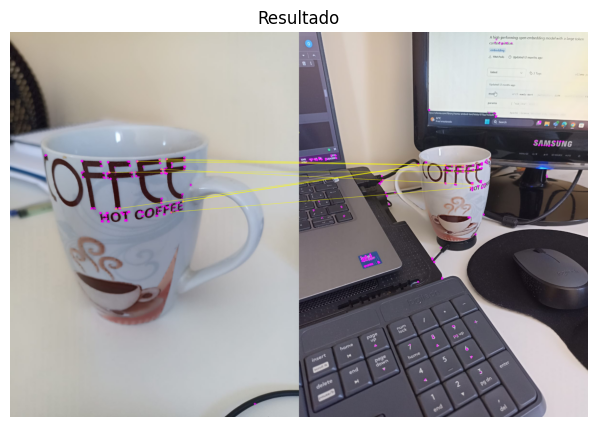

In [55]:
object_match_verification(good_matches)

plt.figure(figsize=(8,5))
plt.imshow(result)
plt.title("Resultado")
plt.axis('off')
plt.show()

##### FLANN Matcher

* Mais rápido que o Brute-Force em bases grandes.
* Usa algoritmos otimizados para aproximação de vizinhos mais próximos.
* Ideal para grandes quantidades de dados ou aplicações em tempo real.

In [56]:
# FLANN + parâmetros para descritores binários
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH,
                    table_number=6,  # pode ajustar
                    key_size=12,     # pode ajustar
                    multi_probe_level=1)  # pode ajustar
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# KNN match: retorna os dois melhores matches para cada ponto
matches = flann.knnMatch(des1, des2, k=2)

# Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

len(good_matches)

22

✅ Objeto detectado via Feature Matching.


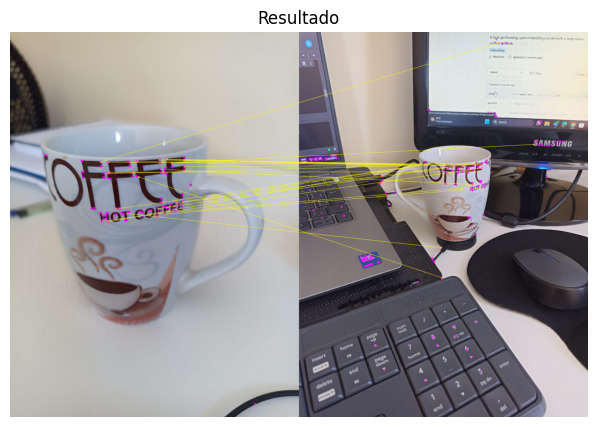

In [57]:
# Desenha os 20 melhores matchs
result = cv2.drawMatches(img_objeto, kp1, img_cena, kp2, good_matches, None,
                         matchColor=(255,255,0), singlePointColor=(255,0,255))

object_match_verification(good_matches)

plt.figure(figsize=(8,5))
plt.imshow(result)
plt.title("Resultado")
plt.axis('off')
plt.show()